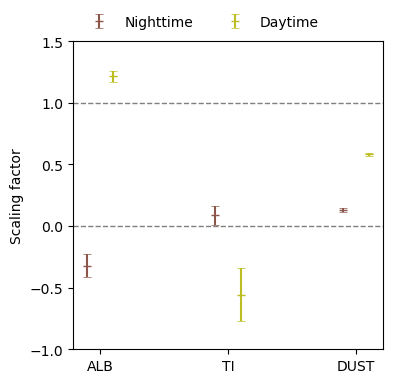

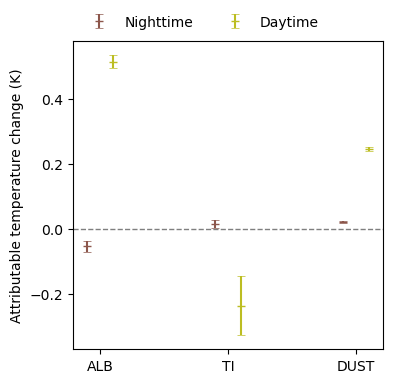

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Configuration & Data Loading ---
# Define paths relative to the script or as absolute paths
base_dir = '../data'
file_path_3 = f'{base_dir}/ofp_beta_3.csv'
file_path_15 = f'{base_dir}/ofp_beta_15.csv'

beta_ols_3 = pd.read_csv(file_path_3)
beta_ols_15 = pd.read_csv(file_path_15)

# --- Constants ---
X_TICKS = np.arange(0, 3, 1)
X_LABELS = ['ALB', 'TI', 'DUST']
BIAS = 0.1

# --- Helper Functions ---

def get_values_and_errors(df, coef=1.0):
    """Calculates y-values and asymmetric errors with an optional coefficient."""
    y = df['beta_hat'] * coef
    lower_err = (df['beta_hat'] - df['beta_hat_inf']) * coef
    upper_err = (df['beta_hat_sup'] - df['beta_hat']) * coef
    return y, [lower_err, upper_err]

def plot_figure(y3, err3, y15, err15, ylabel, y_ticks=None, show_unity_line=False):
    """Generates the figure using archived styles."""
    fig, ax = plt.subplots(figsize=(4, 4))
    
    # Plot Nighttime (3) and Daytime (15)
    ax.errorbar(X_TICKS - BIAS, y3, yerr=err3, fmt='_', c='tab:brown', 
                capsize=3, capthick=0.5, label='Nighttime')
    ax.errorbar(X_TICKS + BIAS, y15, yerr=err15, fmt='_', c='tab:olive', 
                capsize=3, capthick=0.5, label='Daytime')

    # Common Settings
    ax.legend(ncols=2, bbox_to_anchor=(0, 1), loc='lower left', frameon=False)
    ax.set_xticks(X_TICKS, X_LABELS)
    ax.axhline(0, color='tab:gray', lw=1, ls='--')
    
    # Specific Settings
    if show_unity_line:
        ax.axhline(1, color='tab:gray', lw=1, ls='--')
        
    if y_ticks is not None:
        ax.set_yticks(y_ticks)
        
    ax.set_ylabel(ylabel)
    plt.show()

# --- Plot 1: Scaling Factor ---
y3_scale, err3_scale = get_values_and_errors(beta_ols_3)
y15_scale, err15_scale = get_values_and_errors(beta_ols_15)

plot_figure(
    y3_scale, err3_scale, y15_scale, err15_scale,
    ylabel='Scaling factor',
    y_ticks=np.arange(-1, 1.6, 0.5),
    show_unity_line=True
)

# --- Plot 2: Attributable Temperature Change ---
# Coefficients
coef_night = 0.021 * 8
coef_day = 0.053 * 8

y3_temp, err3_temp = get_values_and_errors(beta_ols_3, coef=coef_night)
y15_temp, err15_temp = get_values_and_errors(beta_ols_15, coef=coef_day)

plot_figure(
    y3_temp, err3_temp, y15_temp, err15_temp,
    ylabel='Attributable temperature change (K)',
    show_unity_line=False
)